**About this Dataset**
 IPL is among the most famous cricket league with players coming from worldwide. What makes this series more competitive every year is the drama with every ball and hence this dataset is a complete dataset showing match information and also data for each delivery.

The file IPL_Matches_2008_2021.csv contains all details of the match: Venue of the match, Toss Decision, Match Winer, Man of the Match, Squads, etc.
The file IPL_Ball_by_Ball_2008_2021.csv contains ball by ball data of each and every match: Batsman on strike, Bowler, Extras, Runs, Wicket Ball, etc.


**Dirty Data**
*   Season is write in wrong format **2007/8** instaed of **2009**
*   colums of dataset is chnge id,match_id





**Massive Data**

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
import pandas as pd


matches_path = "/content/matches.csv"
deliveries_path = "/content/deliveries.csv"

matches_df = pd.read_csv(matches_path)
deliveries_df = pd.read_csv(deliveries_path)




<ipython-input-78-87b1e5b6239c>:8: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.



In [79]:
matches_df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,4/18/2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,4/19/2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,4/19/2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,4/20/2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,4/20/2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [80]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,2007/08
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2007/08
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08


In [73]:
deliveries_df.shape

(40308, 18)

In [ ]:
matches_df.shape

(1095, 20)

In [77]:
print("\nTeams participated in IPL:", matches_df["team1"].unique())
print("\nTeams participated in IPL:", matches_df["team2"].unique())



Teams participated in IPL: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']

Teams participated in IPL: ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants' 'Royal Challengers Bengaluru']


In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:

missing_values = matches_df.isnull().sum()


print(missing_values)


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [81]:
missing_values = deliveries_df.isnull().sum()


print(missing_values)

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
season              259825
dtype: int64


In [ ]:
matches_df.shape

(1095, 20)

In [ ]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
print('Total Matches Played:',matches_df.shape[0])

Total Matches Played: 1095


In [ ]:
print(' \n Venues Played At:',matches_df['city'].unique())

 
 Venues Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'
 'Navi Mumbai' 'Lucknow' 'Guwahati' 'Mohali']


In [ ]:
print(' \n Teams :',matches_df['team1'].unique())

 
 Teams : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


In [ ]:
print(' \n Teams :',matches_df['team2'].unique())

 
 Teams : ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants' 'Royal Challengers Bengaluru']


**1) Number of matches played in various seasons :**

In [ ]:
matches_df["season"] = pd.DatetimeIndex(matches_df["date"]).year
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
match_per_season = matches_df.groupby(['season'])['id'].count().reset_index().rename(columns={"id": "matches"})

print(match_per_season)

     season  matches
0   2007/08       58
1      2009       57
2   2009/10       60
3      2011       73
4      2012       74
5      2013       76
6      2014       60
7      2015       59
8      2016       60
9      2017       59
10     2018       60
11     2019       60
12  2020/21       60
13     2021       60
14     2022       74
15     2023       74
16     2024       71


In [ ]:

ump = pd.concat([matches_df["umpire1"], matches_df["umpire2"]])


umps = ump.value_counts()


umps = umps.reset_index()


umps.head(10)


,index,count
0,S Ravi,131
1,AK Chaudhary,131
2,Nitin Menon,104
3,HDPK Dharmasena,98
4,C Shamshuddin,88
5,CB Gaffaney,77
6,KN Ananthapadmanabhan,72
7,M Erasmus,67
8,VK Sharma,65
9,BNJ Oxenford,64


In [ ]:
toss=matches_df["toss_winner"].value_counts().reset_index()
toss.columns = ['Team', 'Toss Wins']
fig = px.bar(toss, x='Team', y='Toss Wins', title="Number of Tosses Won by Each Team",)
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Ensure the 'colors' list is defined
colors = ['blue', 'yellow', 'green', 'red']

def comparison(team1, team2):

    compare = matches_df[((matches_df['team1'] == team1) | (matches_df['team2'] == team1)) &
                         ((matches_df['team1'] == team2) | (matches_df['team2'] == team2))]

    # Creating a histogram to compare the results
    fig = px.histogram(data_frame=compare, x='season', color='winner',
                       labels=dict(x="Season", y="Match Count"),
                       barmode='group', nbins=16, color_discrete_sequence=colors)

    # Updating layout of the chart
    fig.update_layout(title=f"Team Comparison: {team1} vs {team2}",
                      title_font={'size': 26}, template='simple_white')

    # Updating traces for visual enhancement

    # Showing the figure
    fig.show()

# Function call outside the function definition
comparison('Mumbai Indians', 'Chennai Super Kings')


toss_decision
field    704
bat      391
Name: count, dtype: int64
toss_decision
field    377
bat      177
Name: count, dtype: int64


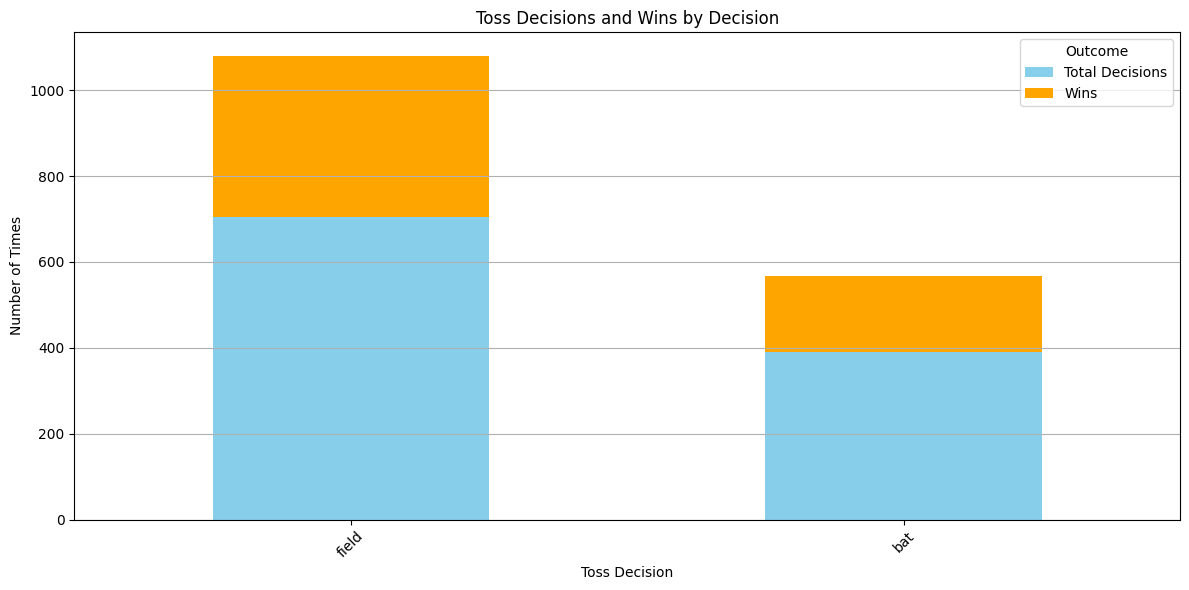

In [122]:


toss_decision_counts = matches_df['toss_decision'].value_counts()
print(
toss_decision_counts)

toss_decision_wins = matches_df[matches_df['toss_winner'] == matches_df['winner']]['toss_decision'].value_counts()
print(toss_decision_wins)

toss_decision_df = pd.DataFrame({
    'Total Decisions': toss_decision_counts,
    'Wins': toss_decision_wins
})


fig, ax = plt.subplots(figsize=(12, 6))

toss_decision_df.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])
plt.title('Toss Decisions and Wins by Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Times')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()




Text(0.5, 1.0, 'Match played in each season')

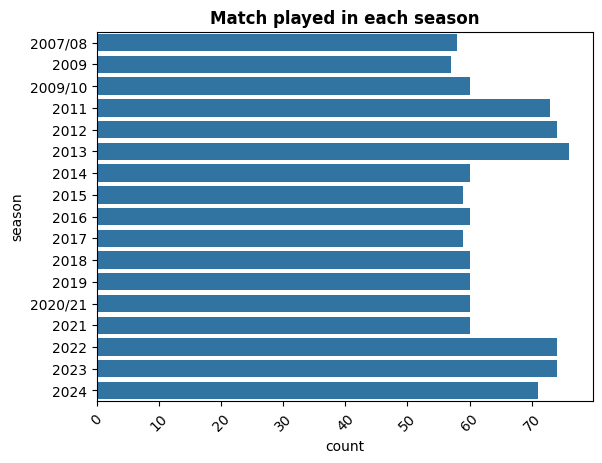

In [88]:
sns.countplot(matches_df["season"])
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("season",fontsize=10)
plt.xlabel("count",fontsize=10)
plt.title("Match played in each season",fontweight="bold")



Mumbai Indians


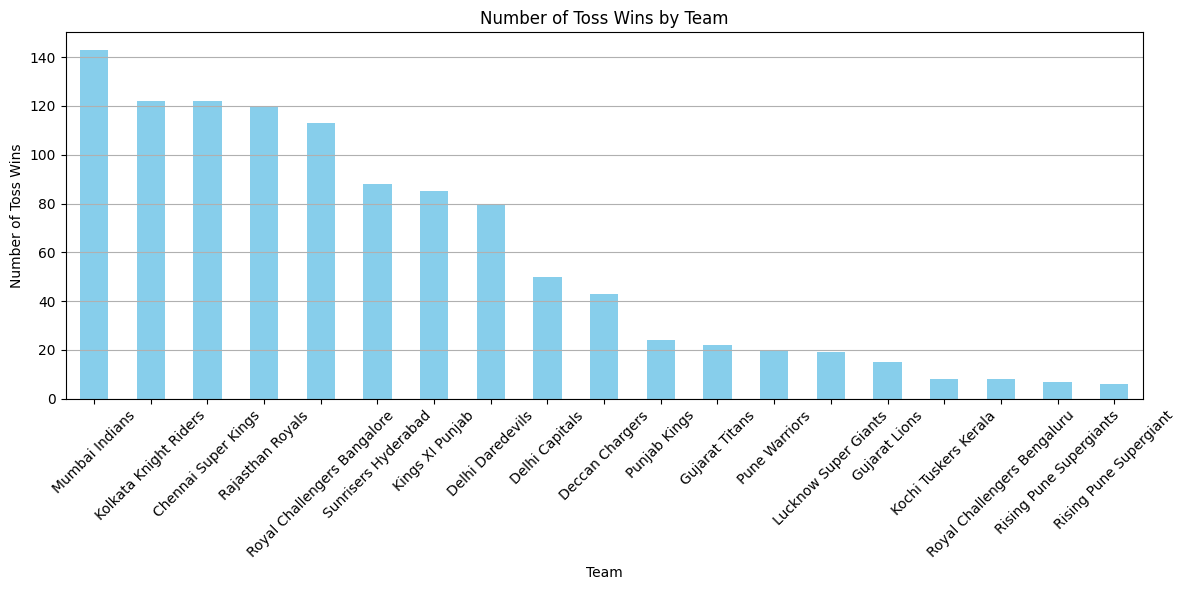

The team with the most toss wins is: Mumbai Indians with 143 wins.


In [116]:
toss_wins_counts = matches_df['toss_winner'].value_counts()
print(toss_wins_counts.idxmax())

plt.figure(figsize=(12, 6))
toss_wins_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Toss Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Toss Wins')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


most_toss_wins_team = toss_wins_counts.idxmax()
most_toss_wins_count = toss_wins_counts.max()

print(f"The team with the most toss wins is: {most_toss_wins_team} with {most_toss_wins_count} wins.")

In [97]:
merging_data = matches_df[["id","season"]].merge(deliveries_df,left_on="id" , right_on= "match_id" , how = "left").drop("id",axis = 1)
merging_data.head()

,season_x,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season_y
0,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,2007/08
1,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08
2,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2007/08
3,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08
4,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2007/08


     season  total_runs
0   2007/08       17937
1      2009       16353
2   2009/10       18883
3      2011       21154
4      2012       22453
5      2013       22602
6      2014       18931
7      2015       18353
8      2016       18862
9      2017       18786
10     2018       19901
11     2019       19434
12  2020/21       19416
13     2021       18637
14     2022       24395
15     2023       25688
16     2024       25971
season        2007/0820092009/102011201220132014201520162017...
total_runs                                               347756
dtype: object


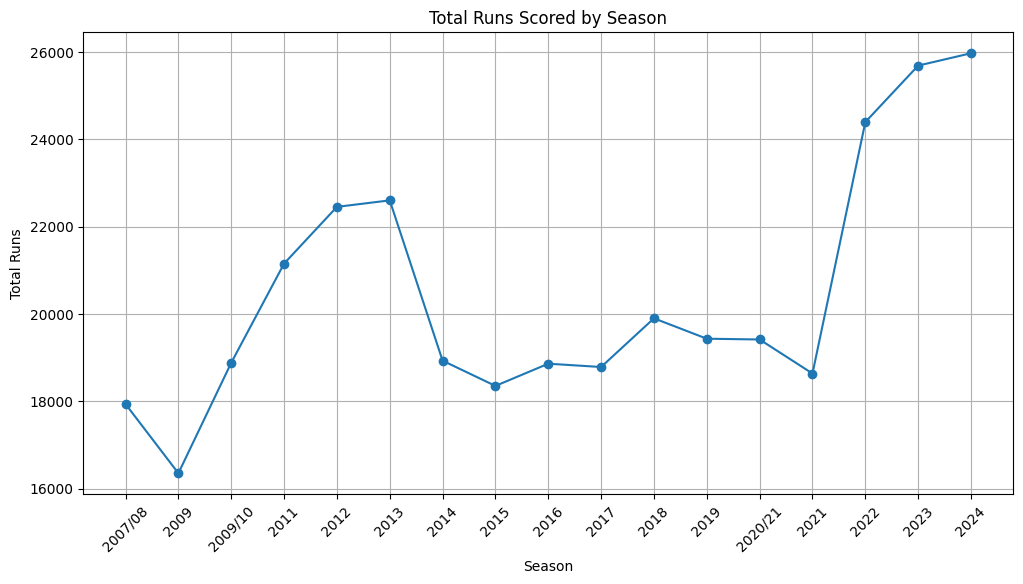

In [107]:







# Merge total runs with matches DataFrame to get runs by season


# Aggregate total runs by season
runs_by_season = matches_runs_df.groupby('season')['total_runs'].sum().reset_index()
print(runs_by_season)
print(runs_by_season.sum())
plt.figure(figsize=(12, 6))
plt.plot(runs_by_season['season'], runs_by_season['total_runs'], marker='o')
plt.title('Total Runs Scored by Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



#Numbers of match won by  each  team in ipl **2008** to **2022**

In [ ]:
import plotly.express as px

figure = px.bar(matches_df, x='winner', title='Number of Matches Won in IPL')
figure.show()


SyntaxError: invalid syntax (<ipython-input-137-9163f45e284e>, line 1)

In [91]:
top_10_bowlers = deliveries_df["bowler"].value_counts().head(10)
fig = px.bar(top_10_bowlers,x=top_10_bowlers.index,y=top_10_bowlers.values,title="Top_10_bowlers in IPL")
fig.show()

In [39]:
player_of_matchs = matches_df["player_of_match"].value_counts().head(10)
figure = px.pie(player_of_matchs,names=player_of_matchs.index,values=player_of_matchs.values,title="players of matches")
figure.show()






**Top scorer Teams in IPL 2008 TO 2022**

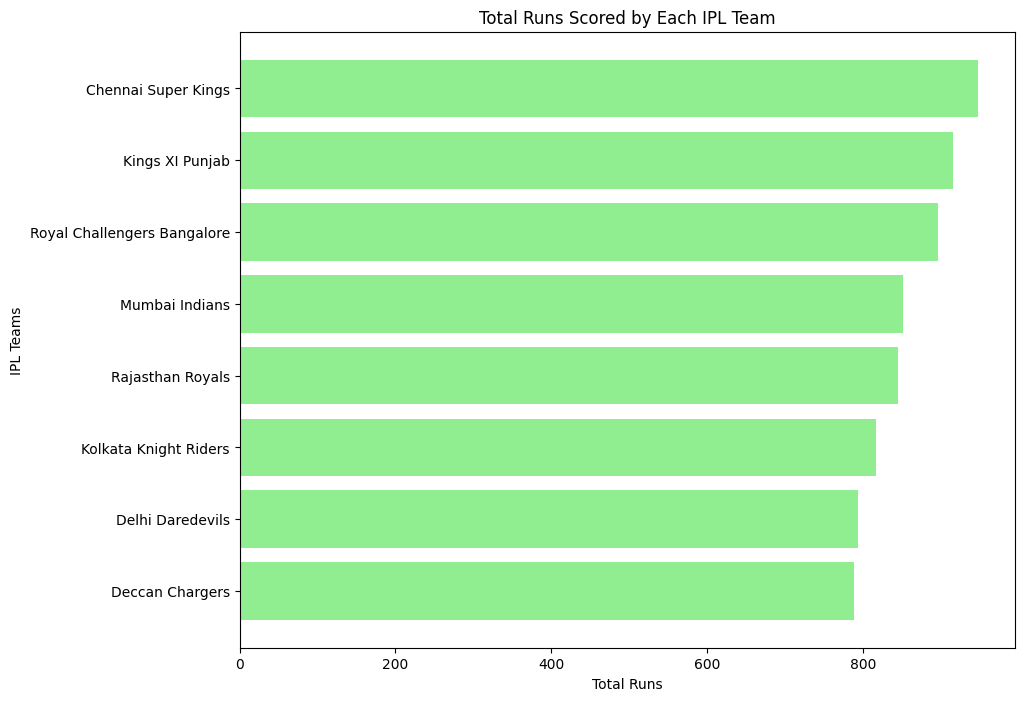

In [52]:
runs_team1 = df.groupby('team1')['target_runs'].sum().reset_index()
runs_team2 = df.groupby('team2')['target_runs'].sum().reset_index()

runs_team1.columns = ['Team', 'Total Runs']
runs_team2.columns = ['Team', 'Total Runs']
total_runs = pd.concat([runs_team1, runs_team2]).groupby('Team').sum().reset_index()

# Step 4: Sort the teams by total runs
total_runs = total_runs.sort_values(by='Total Runs', ascending=False)


plt.figure(figsize=(10, 8))
plt.barh(total_runs['Team'], total_runs['Total Runs'], color='lightgreen')
plt.xlabel('Total Runs')
plt.ylabel('IPL Teams')
plt.title('Total Runs Scored by Each IPL Team')
plt.gca().invert_yaxis()
plt.show()





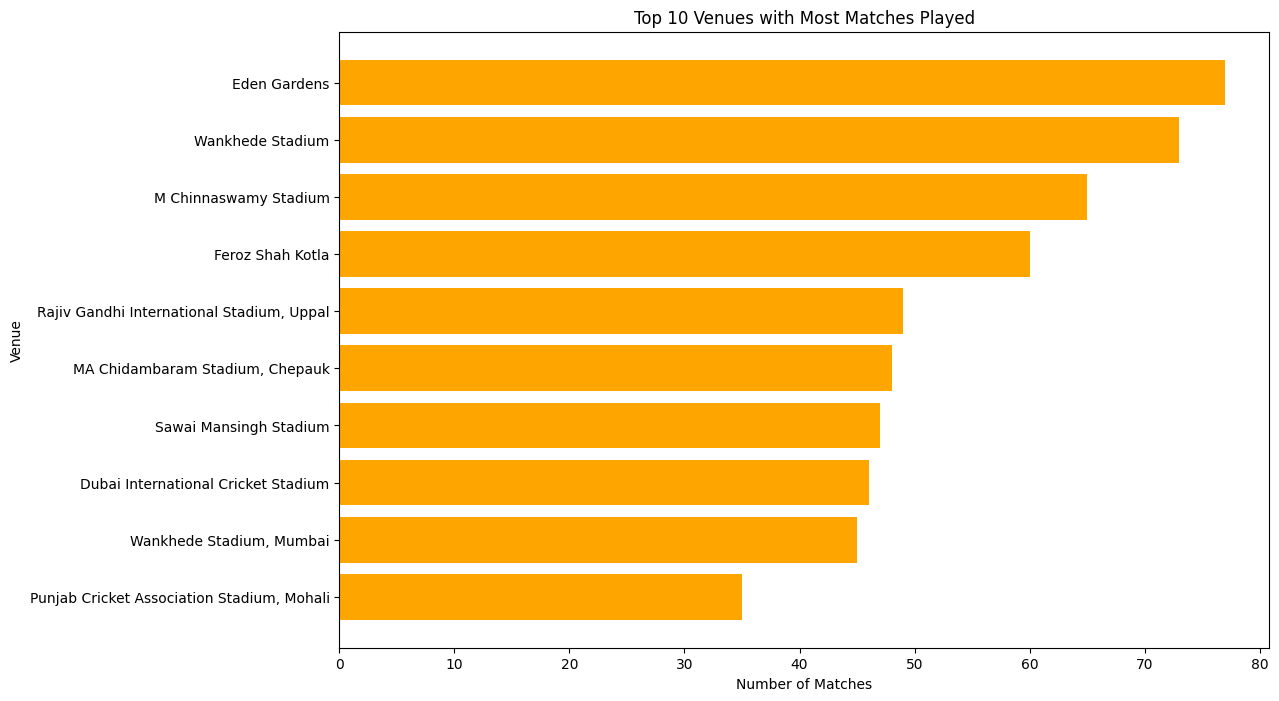

In [58]:


# Step 2: Count the number of matches played at each venue
venue_counts = matches_df['venue'].value_counts().reset_index()
venue_counts.columns = ['Venue', 'Matches']

top_10_venues = venue_counts.head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_10_venues['Venue'], top_10_venues['Matches'], color='orange')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.title('Top 10 Venues with Most Matches Played')
plt.gca().invert_yaxis()
plt.show()


            Umpire  Matches Officiated
0     AK Chaudhary                  14
1  HDPK Dharmasena                  12
2           S Ravi                  11
3        Asad Rauf                   8
4    C Shamshuddin                   7
5        CK Nandan                   6
6        M Erasmus                   6
7   A Nand Kishore                   6
8      Nitin Menon                   6
9       SJA Taufel                   6


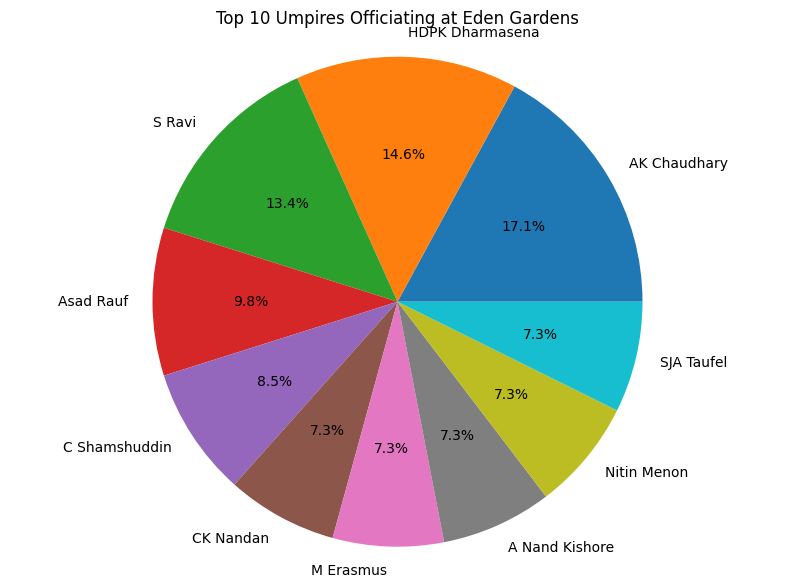

In [65]:

eden_gardens_df = matches_df[matches_df['venue'] == 'Eden Gardens']


umpires_series = pd.concat([eden_gardens_df['umpire1'], eden_gardens_df['umpire2']])


umpire_counts = umpires_series.value_counts().reset_index()
umpire_counts.columns = ['Umpire', 'Matches Officiated']


top_ten = umpire_counts.head(10)


print(top_ten)


plt.figure(figsize=(10, 7))
plt.pie(top_ten['Matches Officiated'], labels=top_ten['Umpire'], autopct='%1.1f%%')
plt.title('Top 10 Umpires Officiating at Eden Gardens')
plt.axis('equal')
plt.show()


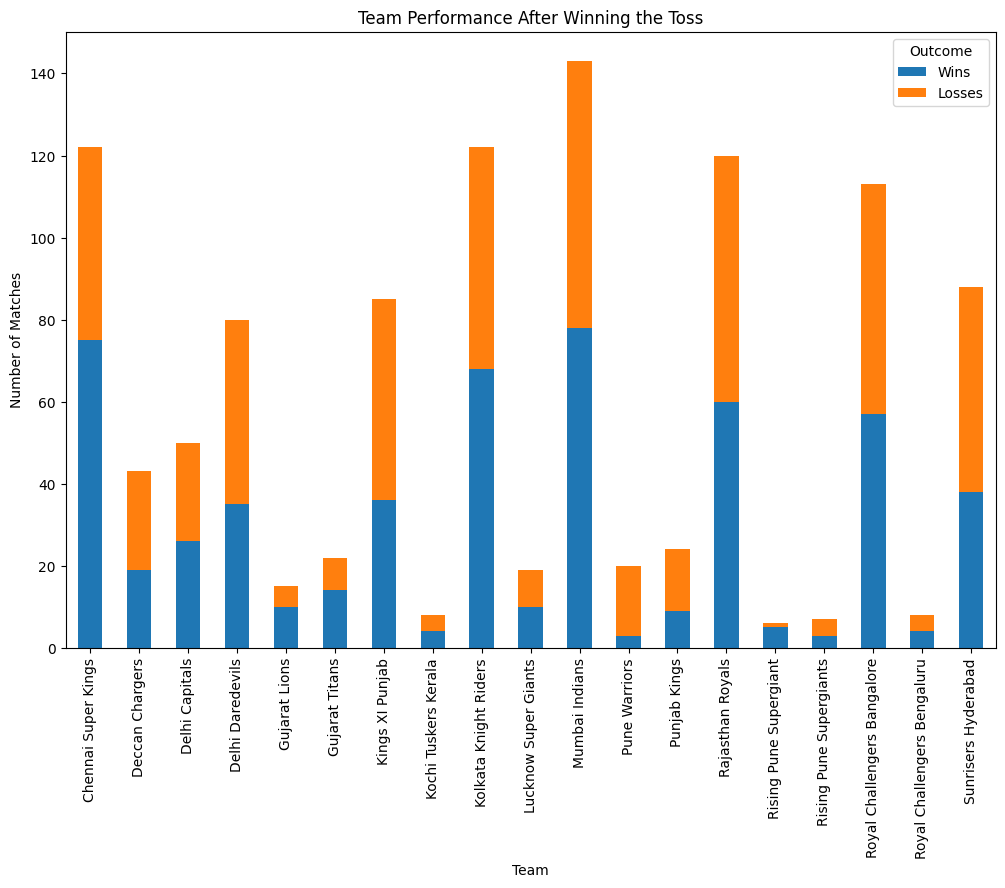

In [72]:
toss_wins = matches_df[matches_df['toss_winner'] == matches_df['winner']]
toss_losses = matches_df[matches_df['toss_winner'] != matches_df['winner']]

win_counts = toss_wins['toss_winner'].value_counts()
loss_counts = toss_losses['toss_winner'].value_counts()

results_df = pd.DataFrame({
    'Wins': win_counts,
    'Losses': loss_counts
})


results_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Team Performance After Winning the Toss')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.legend(title='Outcome')

plt.show()

In [9]:
import pandas as pd
import plotly.graph_objects as go


data = {'result': ['wicket', 'runs']}
matches_df = pd.DataFrame(data)


matches_df["result"] = matches_df["result"].map({"wicket": "chasing", "runs": "defending"})
won_by = matches_df["result"].value_counts()


fig = go.Figure(data=[go.Pie(labels=won_by.index, values=won_by.values)])
fig.update_layout(title_text="Number of Matches Won by Defending and Chasing")
fig.update_traces(hoverinfo="label+percent", textinfo="value")
fig.show()
